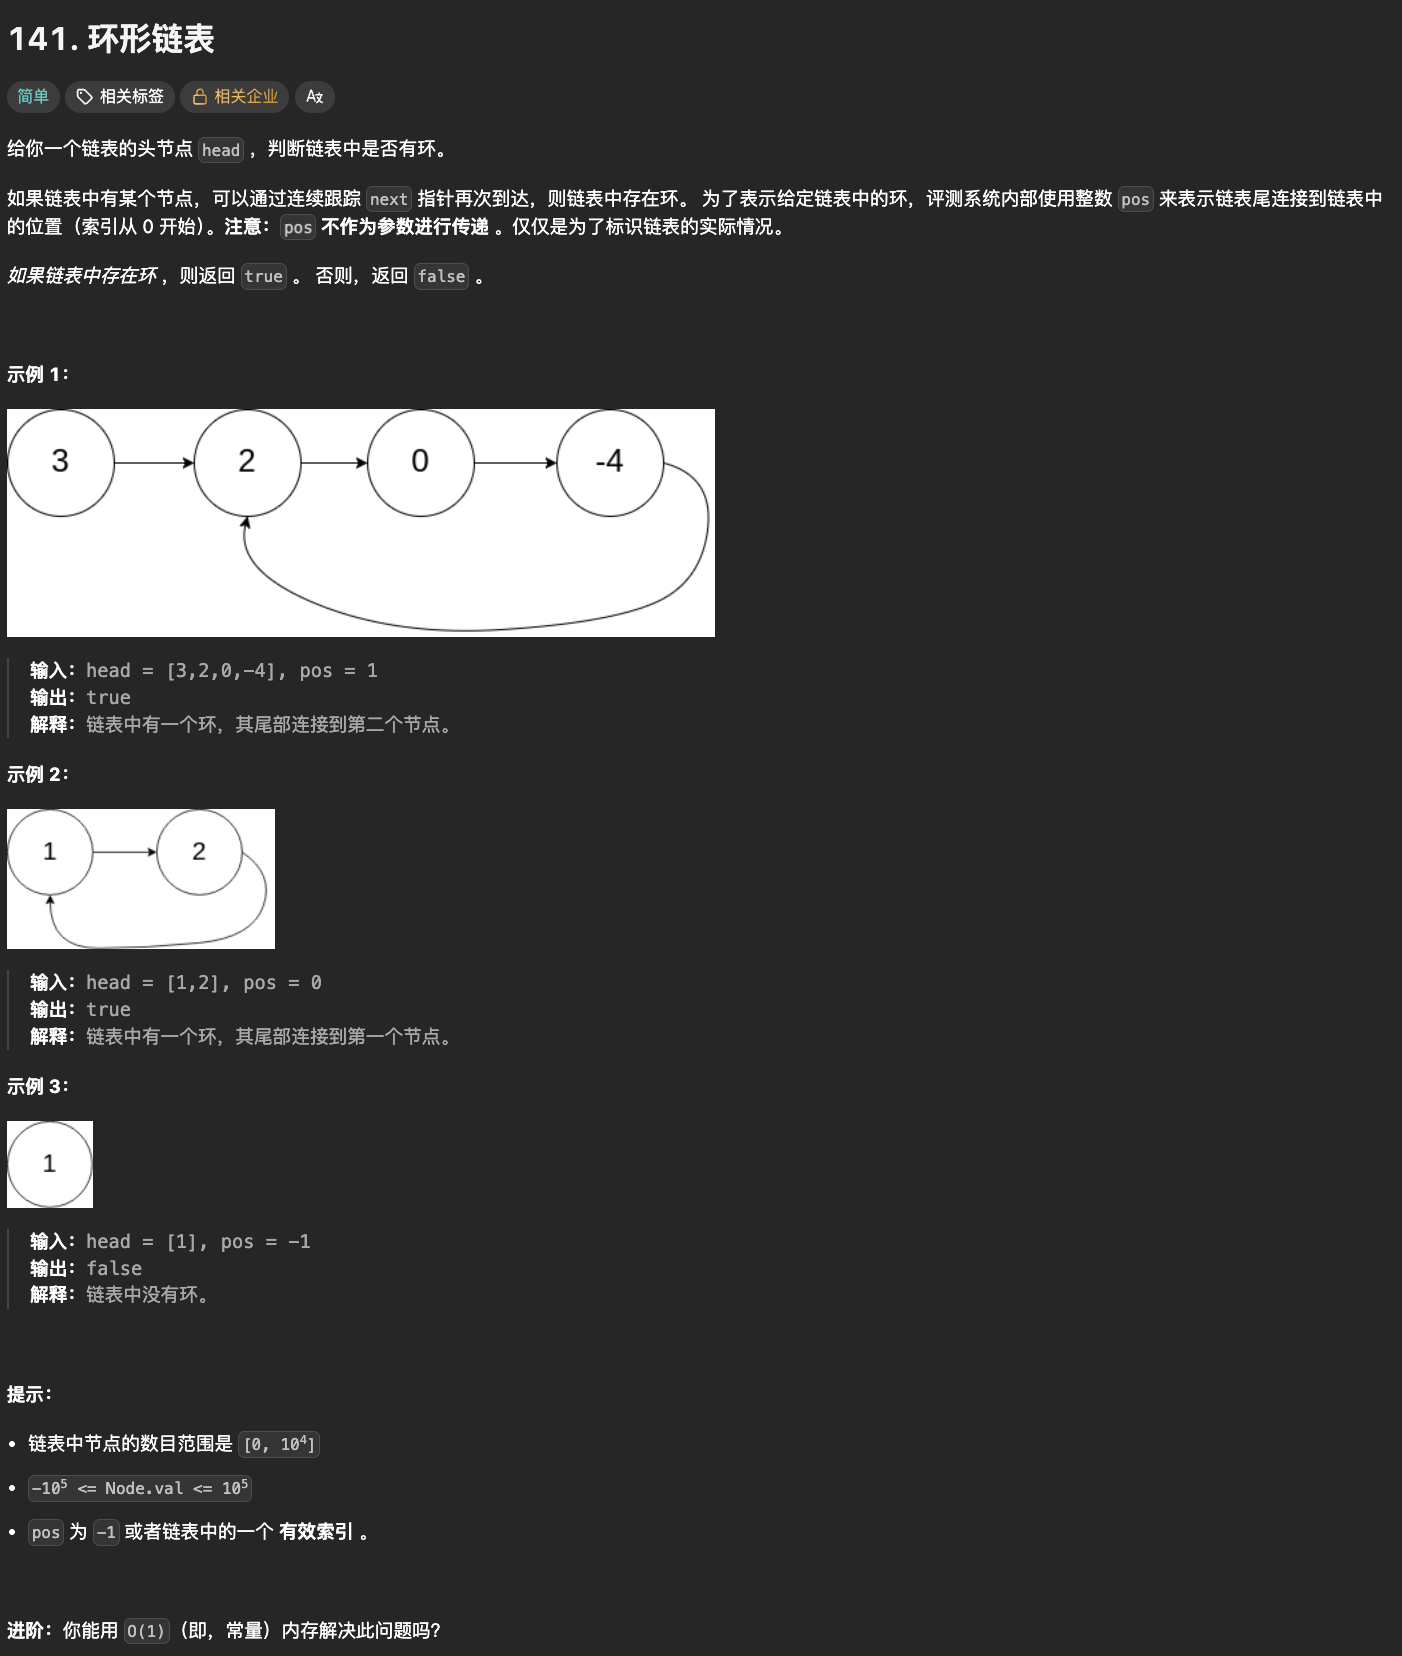

### 如果有环，快慢指针一定相遇
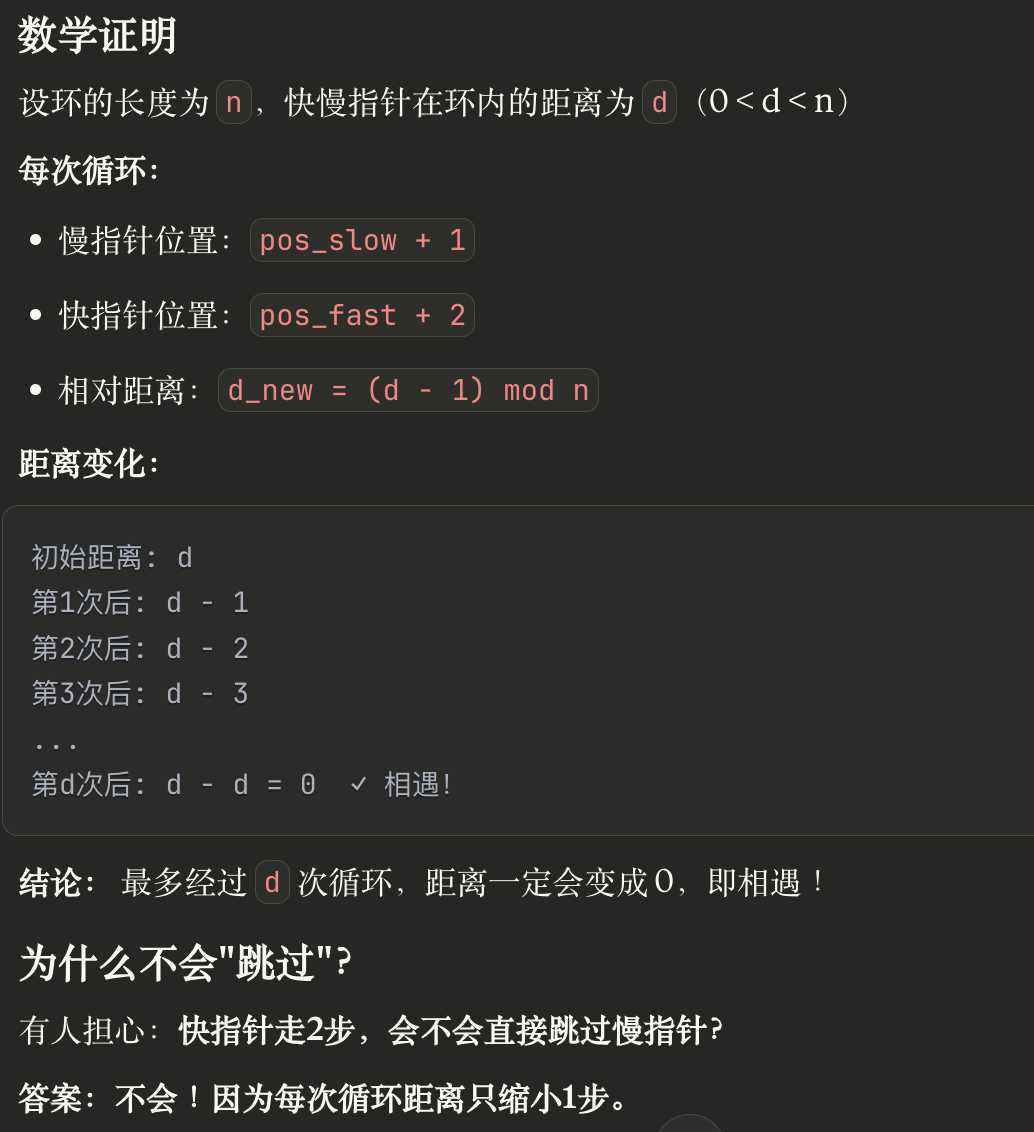

## 题目描述
给你一个链表的头节点 `head`,判断链表中是否有环。

如果链表中有某个节点,可以通过连续跟踪 `next` 指针再次到达,则链表中存在环。返回 `true`;否则,返回 `false`。

## 解题思路

### 核心算法逻辑(快慢指针):

- **快指针(fast)**:每次走 **2 步**
- **慢指针(slow)**:每次走 **1 步**
- 如果有环,快指针最终会追上慢指针(相遇)
- 如果无环,快指针会先到达 `None`

**为什么快指针一定能追上慢指针?**

想象在操场跑圈:
- A 跑得慢(slow),B 跑得快(fast)
- 如果是环形跑道,B 一定会追上 A
- 如果是直线跑道,B 会先到终点

**时间复杂度:** O(n)  
**空间复杂度:** O(1)

## 关键点和易错点

### 关键点:
1. **快慢指针速度差**:快指针走2步,慢指针走1步
2. **相遇即有环**:只要快慢指针相遇,就说明有环
3. **到达None即无环**:快指针或快指针的next到达None,说明无环

### 易错点:
1. **空链表处理**:head 为 None 要返回 False
2. **循环条件**:`while fast and fast.next` 防止空指针异常
3. **相遇判断**:用 `slow == fast` 判断,不是比较值而是比较是否是同一个对象
4. **初始位置**:slow 和 fast 都从 head 开始

In [1]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def hasCycle(self, head: ListNode) -> bool:
        # 边界条件:空链表或只有一个节点且无环
        if not head or not head.next:
            return False
        
        # 初始化快慢指针
        slow = head
        fast = head
        
        # 快指针走2步,慢指针走1步
        while fast and fast.next:
            slow = slow.next          # 慢指针走1步
            fast = fast.next.next     # 快指针走2步
            
            # 如果快慢指针相遇,说明有环
            if slow == fast:
                return True
        
        # 快指针到达了末尾,说明无环
        return False


if __name__ == '__main__':
    solution = Solution()
    
    # 测试用例1: 有环
    # 3 -> 2 -> 0 -> -4
    #      ↑         ↓
    #      ← ← ← ← ←
    print("测试用例1: [3,2,0,-4], pos=1 (有环)")
    node1 = ListNode(3)
    node2 = ListNode(2)
    node3 = ListNode(0)
    node4 = ListNode(-4)
    node1.next = node2
    node2.next = node3
    node3.next = node4
    node4.next = node2  # 形成环,指向node2
    result1 = solution.hasCycle(node1)
    print(f"是否有环: {result1}")  # True
    print()
    
    # 测试用例2: 有环,自环
    # 1 -> 2
    # ↑    ↓
    # ← ← ←
    print("测试用例2: [1,2], pos=0 (有环)")
    node5 = ListNode(1)
    node6 = ListNode(2)
    node5.next = node6
    node6.next = node5  # 形成环,指向node5
    result2 = solution.hasCycle(node5)
    print(f"是否有环: {result2}")  # True
    print()
    
    # 测试用例3: 无环
    # 1 -> 2 -> 3 -> None
    print("测试用例3: [1,2,3], 无环")
    node7 = ListNode(1)
    node8 = ListNode(2)
    node9 = ListNode(3)
    node7.next = node8
    node8.next = node9
    result3 = solution.hasCycle(node7)
    print(f"是否有环: {result3}")  # False
    print()
    
    # 测试用例4: 单节点无环
    # 1 -> None
    print("测试用例4: [1], 无环")
    node10 = ListNode(1)
    result4 = solution.hasCycle(node10)
    print(f"是否有环: {result4}")  # False
    print()
    
    # 测试用例5: 单节点自环
    # 1 -> 1 (自己指向自己)
    print("测试用例5: [1], pos=0 (自环)")
    node11 = ListNode(1)
    node11.next = node11  # 自己指向自己
    result5 = solution.hasCycle(node11)
    print(f"是否有环: {result5}")  # True

测试用例1: [3,2,0,-4], pos=1 (有环)
是否有环: True

测试用例2: [1,2], pos=0 (有环)
是否有环: True

测试用例3: [1,2,3], 无环
是否有环: False

测试用例4: [1], 无环
是否有环: False

测试用例5: [1], pos=0 (自环)
是否有环: True
